### IMPOET LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spam_df=pd.read_csv(f"Downloads/P74-Project-6/Project 6/emails.csv")

In [4]:
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [6]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [26]:
spam_df.isnull().sum()

text    0
spam    0
dtype: int64

### VISUALIZE DATASET

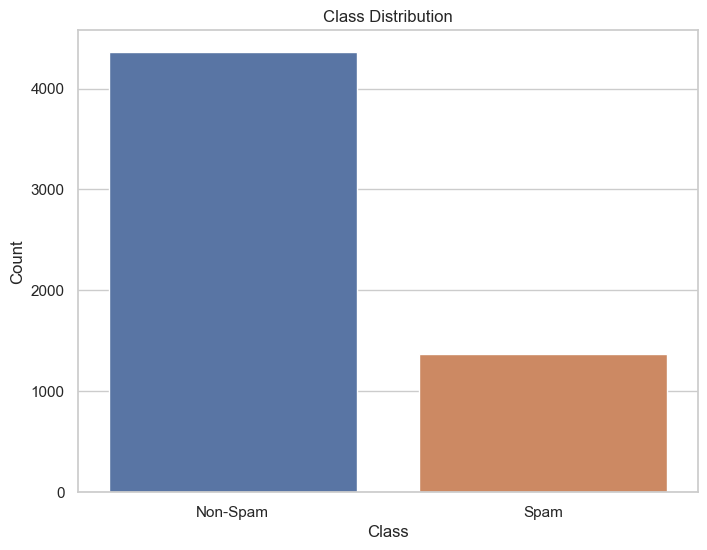

In [10]:

plt.figure(figsize=(8, 6))
sns.countplot(x='spam', data=spam_df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Spam', 'Spam'])
plt.show()

In [13]:
spam_emails = spam_df[spam_df['spam'] == 1]
non_spam_emails = spam_df[spam_df['spam'] == 0]


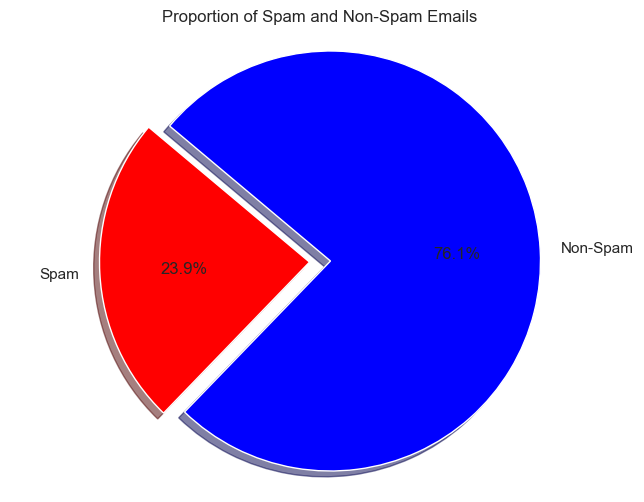

In [21]:
spam_count = spam_df[spam_df['spam'] == 1].shape[0]
non_spam_count = spam_df[spam_df['spam'] == 0].shape[0]


labels = ['Spam', 'Non-Spam']
sizes = [spam_count, non_spam_count]
colors = ['red', 'blue']
explode = (0.1, 0)  

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Spam and Non-Spam Emails')
plt.axis('equal') 
plt.show()

In [14]:
spam_emails

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [15]:
non_spam_emails

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


### PRE-PROCESSING

In [22]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()

spam_cntvect = vectorizer.fit_transform(spam_df["text"])

In [24]:
spam_cntvect.shape

(5728, 37303)

### MODEL TRAING

In [28]:
X = spam_cntvect
y = spam_df['spam']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [30]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

### MODEL EVALUATION

In [38]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [35]:
y_train_pred = nb_model.predict(X_train)

In [36]:
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9960715844609341


In [39]:
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
print("\nTraining Confusion Matrix:")
print(train_confusion_matrix)


Training Confusion Matrix:
[[3452   17]
 [   1 1112]]


In [41]:
y_test_pred = nb_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.9930191972076788


In [42]:
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
print("\nTesting Confusion Matrix:")
print(test_confusion_matrix)


Testing Confusion Matrix:
[[884   7]
 [  1 254]]


In [43]:
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       891
           1       0.97      1.00      0.98       255

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



### PREDICTING ENVIRONMENT

In [47]:
def predict_spam_or_ham(message):
    # Vectorize the input message using the same CountVectorizer used for training
    message_vectorized = vectorizer.transform([message])

    # Predict the label (0 for ham, 1 for spam)
    prediction = nb_model.predict(message_vectorized)[0]

    # Map the predicted label to 'spam' or 'ham'
    if prediction == 1:
        return "Spam"
    else:
        return "Ham"

# Interactive loop for predicting messages
while True:
    # Prompt the user to enter a message
    message = input("Enter a message (type 'exit' to quit): ")

    # Check if the user wants to exit
    if message.lower() == 'exit':
        print("Exiting...")
        print("Thank You")
        break

    # Predict whether the message is spam or ham
    prediction = predict_spam_or_ham(message)
    print("Prediction:", prediction)


Enter a message (type 'exit' to quit):  Just wanted to remind you about our meeting tomorrow at 10:00 AM in conference room B. Please make sure to bring the updated project report with you.  Looking forward to seeing you there!


Prediction: Ham


Enter a message (type 'exit' to quit):  Congratulations! You've won a free vacation to a tropical paradise! Claim your prize now by clicking the link below!


Prediction: Spam


Enter a message (type 'exit' to quit):  exit


Exiting...
/nThank You
